# EEG Data Preprocessing

## Converting Files to CSVs

In [7]:
import matplotlib.pyplot as plt
import mne
import pandas as pd
import numpy as np

In [ ]:


# Angi filstier direkte (tilpass disse til dine filer)
vhdr_file = "EEG test filer/Participant_MovementIntent000005.vhdr"  # Endre til din .vhdr-fil
output_csv = "EEG test filer/Participant_MovementIntent000005.csv"    # Ønsket lagringssti

def convert_brainvision_to_csv(vhdr_file, output_csv, annotation_window=0.005):
    """
    Leser en BrainVision-fil (.vhdr) og konverterer data til CSV med annotasjoner.
    Alle tilhørende filer (.eeg, .vmrk) lastes automatisk.
    """
    print(f"Laster data fra {vhdr_file} ...")
    raw = mne.io.read_raw_brainvision(vhdr_file, preload=True, verbose='ERROR')
    
    # Hent data og tidspunkter
    data, times = raw.get_data(return_times=True)
    df = pd.DataFrame(data.T, columns=raw.ch_names)
    df['time'] = times
    
    # Legg til en kolonne for annotasjoner dersom den ikke finnes
    if 'annotation' not in df.columns:
        df['annotation'] = ""
    
    # Sett inn annotasjoner fra raw.annotations
    for annot in raw.annotations:
        onset = annot['onset']
        duration = annot['duration']
        description = annot['description']
        start_idx = np.searchsorted(times, onset)
        end_idx = np.searchsorted(times, onset + duration)
        if end_idx == start_idx:
            end_idx = np.searchsorted(times, onset + annotation_window)
        df.loc[start_idx:end_idx, 'annotation'] = description
    
    df.to_csv(output_csv, index=False)
    print(f"Data lagret til {output_csv}")
    print("Annotasjoner funnet:")
    print(raw.annotations)
    return raw

# Kjør konverteringen
convert_brainvision_to_csv(vhdr_file, output_csv)


## Loading relevant CSV files to dataframe

In [2]:


# Definer en liste med CSV-filer med EEG-data (oppdater stinavnene til dine filer)
csv_files = [
    "EEG test filer/Participant_MovementIntent000005.csv"
]

# Liste for å lagre DataFrames fra hver fil
df_list = []

# Last inn hver CSV-fil og legg til i listen
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Lastet {file} med {df.shape[0]} rader og {df.shape[1]} kolonner.")
    except Exception as e:
        print(f"Feil ved lasting av {file}: {e}")

# Kombiner alle DataFrames til én DataFrame
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print("Kombinert DataFrame har", combined_df.shape[0], "rader og", combined_df.shape[1], "kolonner.")
    print(combined_df.head())
else:
    print("Ingen CSV-filer ble lastet.")


Lastet EEG test filer/Participant_MovementIntent000005.csv med 46740 rader og 38 kolonner.
Kombinert DataFrame har 46740 rader og 38 kolonner.
        Fp1        Fz        F3        F7       FT9       FC5       FC1  \
0 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
1 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
2 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
3 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
4 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   

         C3        T7       TP9  ...       FC2        F4        F8       Fp2  \
0 -0.341333 -0.018392 -0.015152  ... -0.341333 -0.341333 -0.025168 -0.341333   
1 -0.341333 -0.018333 -0.015375  ... -0.341333 -0.341333 -0.024102 -0.341333   
2 -0.341333 -0.017888 -0.015402  ... -0.341333 -0.341333 -0.022145 -0.341333   
3 -0.341333 -0.017543 -0.015286  ... -0.341333 -0.341333 -0.020822 -0.341333   
4 -0.3

In [3]:
# Sjekk dimensjoner og kolonnenavn i den kombinerte DataFrame-en
print("Antall rader:", combined_df.shape[0])
print("Antall kolonner:", combined_df.shape[1])
print("\nKolonnenavn:")
print(combined_df.columns.tolist())

# Skriv ut de første 5 radene
combined_df.head()


Antall rader: 46740
Antall kolonner: 38

Kolonnenavn:
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'Aux1', 'x_dir', 'y_dir', 'z_dir', 'time', 'annotation']


,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,TP9,...,FC2,F4,F8,Fp2,Aux1,x_dir,y_dir,z_dir,time,annotation
0,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.018392,-0.015152,...,-0.341333,-0.341333,-0.025168,-0.341333,-3.359109,7.0,1041.0,252.0,0.000,New Segment/
1,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.018333,-0.015375,...,-0.341333,-0.341333,-0.024102,-0.341333,-4.180016,7.0,1041.0,252.0,0.002,New Segment/
2,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.017888,-0.015402,...,-0.341333,-0.341333,-0.022145,-0.341333,-4.217483,3.0,1043.0,249.0,0.004,NaN
3,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.017543,-0.015286,...,-0.341333,-0.341333,-0.020822,-0.341333,-4.170677,3.0,1043.0,249.0,0.006,NaN
4,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.017370,-0.015090,...,-0.341333,-0.341333,-0.020770,-0.341333,-3.684541,3.0,1043.0,249.0,0.008,NaN


Antall forekomster per annotasjon:
nan              46651
Comment/Yoooo       68
Comment/Halla       15
New Segment/         2
Comment/Hei          2
Comment/Hallo        2
Name: annotation, dtype: int64


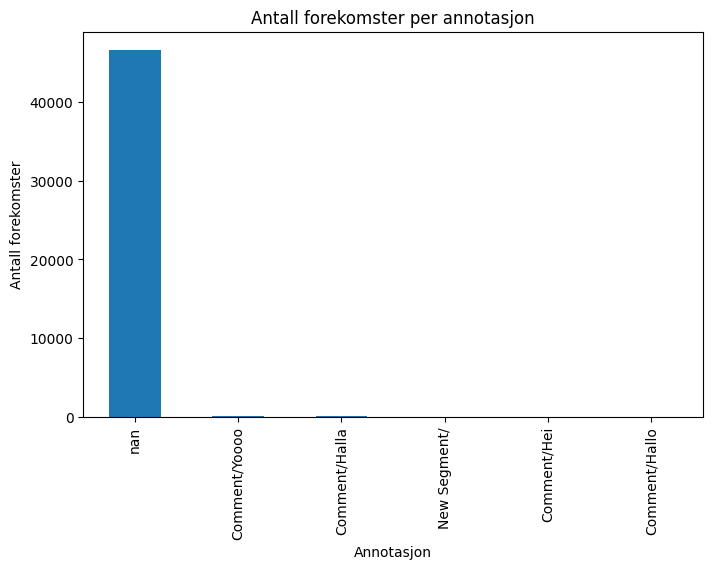

In [8]:


# Sørg for at annotasjonskolonnen er av typen string
combined_df['annotation'] = combined_df['annotation'].astype(str).str.strip()

# Filtrer ut tomme annotasjoner
annot_df = combined_df[combined_df['annotation'] != ""]

# Tell antall forekomster for hver annotasjon
annotation_counts = annot_df['annotation'].value_counts()
print("Antall forekomster per annotasjon:")
print(annotation_counts)

# Plot et stolpediagram
annotation_counts.plot(kind='bar', figsize=(8, 5), title="Antall forekomster per annotasjon")
plt.xlabel("Annotasjon")
plt.ylabel("Antall forekomster")
plt.show()


In [13]:
import numpy as np

# Først erstatter vi tomme strenger med NaN
combined_df['annotation'] = combined_df['annotation'].replace("", np.nan)

# Fyll fremover slik at hver annotasjon varer til neste annotasjon inntreffer
combined_df['annotation'] = combined_df['annotation'].ffill()

# For å se effekten, vis de første radene der annotasjonen endres
annotation_changes = combined_df[combined_df['annotation'].shift() != combined_df['annotation']]
print(annotation_changes[['time', 'annotation']].head(200))


         time     annotation
0       0.000   New Segment/
2       0.004            nan
2760    5.520    Comment/Hei
2762    5.524            nan
5280   10.560  Comment/Yoooo
...       ...            ...
44742  89.484            nan
44760  89.520  Comment/Yoooo
44762  89.524            nan
44780  89.560  Comment/Yoooo
44782  89.564            nan

[84 rows x 2 columns]


# NEW NOTEBOOK

In [1]:
import os
import matplotlib.pyplot as plt
import mne
import pandas as pd
import numpy as np

# For å forenkle logging i MNE
mne.set_log_level("ERROR")


## Steg 2: Hjelpefunksjoner for konvertering


In [2]:
def convert_edf_to_csv(edf_path, output_csv, annotation_window=0.005):
    """
    Leser en EDF-fil (f.eks. fra PhysioNet) og konverterer data til CSV.
    Hvis datasettet har event-liste i f.eks. .edf.event, kan det kreve custom parsing,
    men her viser vi et generisk MNE-oppsett.
    """
    print(f"\n[EDF->CSV] Laster data fra {edf_path} ...")
    raw = mne.io.read_raw_edf(edf_path, preload=True, verbose='ERROR')
    
    data, times = raw.get_data(return_times=True)
    df = pd.DataFrame(data.T, columns=raw.ch_names)
    df['time'] = times
    # Sett tom annotation-kolonne
    df['annotation'] = ""

    # Hvis .edf har interne annotations i raw.annotations:
    for annot in raw.annotations:
        onset = annot['onset']
        duration = annot['duration']
        description = annot['description']
        start_idx = np.searchsorted(times, onset)
        end_idx = np.searchsorted(times, onset + duration)
        if end_idx == start_idx:
            end_idx = np.searchsorted(times, onset + annotation_window)
        df.loc[start_idx:end_idx, 'annotation'] = description

    df.to_csv(output_csv, index=False)
    print(f"   -> Lagret til {output_csv}. Antall rader: {len(df)}")
    return df


def convert_brainvision_to_csv(vhdr_file, output_csv, annotation_window=0.005):
    """
    Leser en BrainVision-fil (.vhdr) og konverterer data til CSV med annotasjoner.
    Alle tilhørende filer (.vmrk, .eeg) må ha samme basenavn som .vhdr,
    og MNE leter i samme mappe.
    """
    print(f"\n[VHDR->CSV] Laster data fra {vhdr_file} ...")
    raw = mne.io.read_raw_brainvision(vhdr_file, preload=True, verbose='ERROR')
    
    data, times = raw.get_data(return_times=True)
    df = pd.DataFrame(data.T, columns=raw.ch_names)
    df['time'] = times
    
    df['annotation'] = ""  # Tom kolonne for annotasjoner

    # Les annotation-objekter fra raw
    for annot in raw.annotations:
        onset = annot['onset']
        duration = annot['duration']
        description = annot['description']
        start_idx = np.searchsorted(times, onset)
        end_idx = np.searchsorted(times, onset + duration)
        # Hvis end_idx == start_idx, utvid litt
        if end_idx == start_idx:
            end_idx = np.searchsorted(times, onset + annotation_window)
        df.loc[start_idx:end_idx, 'annotation'] = description
    
    df.to_csv(output_csv, index=False)
    print(f"   -> Lagret til {output_csv} (rader: {len(df)})")
    return df


## Steg 3: Opprett mapper for CSV-output (valgfritt)


In [3]:
os.makedirs("csv_output/physionet", exist_ok=True)
os.makedirs("csv_output/selfmade", exist_ok=True)


## Steg 4: Konverter *alle* EDF-filer i physionet
Vi itererer subjekter S001, S002, ... og R-filer R01, R02, ...


In [5]:
physionet_base = "data/big_datasets/physionet"
csv_physio_outbase = "csv_output/physionet"

all_physio_csv = []

for subj_dir in os.listdir(physionet_base):
    subj_path = os.path.join(physionet_base, subj_dir)
    if os.path.isdir(subj_path):
        # Finn alle .edf filer i subj_dir
        edf_files = [f for f in os.listdir(subj_path) if f.lower().endswith(".edf")]
        for edf_name in edf_files:
            edf_path = os.path.join(subj_path, edf_name)
            # Lag en unik csv fil
            csv_name = edf_name.replace(".edf", ".csv")
            out_csv = os.path.join(csv_physio_outbase, f"{subj_dir}_{csv_name}")

            df = convert_edf_to_csv(edf_path, out_csv)
            all_physio_csv.append(out_csv)

print(f"\nKonverterte {len(all_physio_csv)} EDF-filer fra PhysioNet til CSV.")



[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R01.edf ...
   -> Lagret til csv_output/physionet\S001_S001R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R02.edf ...
   -> Lagret til csv_output/physionet\S001_S001R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R03.edf ...
   -> Lagret til csv_output/physionet\S001_S001R03.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R04.edf ...
   -> Lagret til csv_output/physionet\S001_S001R04.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R05.edf ...
   -> Lagret til csv_output/physionet\S001_S001R05.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R06.edf ...
   -> Lagret til csv_output/physionet\S001_S001R06.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S001\S001R07.edf ...
   -> L

   -> Lagret til csv_output/physionet\S004_S004R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S004\S004R14.edf ...
   -> Lagret til csv_output/physionet\S004_S004R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S005\S005R01.edf ...
   -> Lagret til csv_output/physionet\S005_S005R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S005\S005R02.edf ...
   -> Lagret til csv_output/physionet\S005_S005R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S005\S005R03.edf ...
   -> Lagret til csv_output/physionet\S005_S005R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S005\S005R04.edf ...
   -> Lagret til csv_output/physionet\S005_S005R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S005\S005R05.edf ...
   -> Lagret til csv_output/physionet\S005_S005R05.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S008_S008R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S008\S008R12.edf ...
   -> Lagret til csv_output/physionet\S008_S008R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S008\S008R13.edf ...
   -> Lagret til csv_output/physionet\S008_S008R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S008\S008R14.edf ...
   -> Lagret til csv_output/physionet\S008_S008R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S009\S009R01.edf ...
   -> Lagret til csv_output/physionet\S009_S009R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S009\S009R02.edf ...
   -> Lagret til csv_output/physionet\S009_S009R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S009\S009R03.edf ...
   -> Lagret til csv_output/physionet\S009_S009R03.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S012_S012R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S012\S012R10.edf ...
   -> Lagret til csv_output/physionet\S012_S012R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S012\S012R11.edf ...
   -> Lagret til csv_output/physionet\S012_S012R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S012\S012R12.edf ...
   -> Lagret til csv_output/physionet\S012_S012R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S012\S012R13.edf ...
   -> Lagret til csv_output/physionet\S012_S012R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S012\S012R14.edf ...
   -> Lagret til csv_output/physionet\S012_S012R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S013\S013R01.edf ...
   -> Lagret til csv_output/physionet\S013_S013R01.csv. Antall rader: 9760

[EDF->

   -> Lagret til csv_output/physionet\S016_S016R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S016\S016R08.edf ...
   -> Lagret til csv_output/physionet\S016_S016R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S016\S016R09.edf ...
   -> Lagret til csv_output/physionet\S016_S016R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S016\S016R10.edf ...
   -> Lagret til csv_output/physionet\S016_S016R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S016\S016R11.edf ...
   -> Lagret til csv_output/physionet\S016_S016R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S016\S016R12.edf ...
   -> Lagret til csv_output/physionet\S016_S016R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S016\S016R13.edf ...
   -> Lagret til csv_output/physionet\S016_S016R13.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S020_S020R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S020\S020R06.edf ...
   -> Lagret til csv_output/physionet\S020_S020R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S020\S020R07.edf ...
   -> Lagret til csv_output/physionet\S020_S020R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S020\S020R08.edf ...
   -> Lagret til csv_output/physionet\S020_S020R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S020\S020R09.edf ...
   -> Lagret til csv_output/physionet\S020_S020R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S020\S020R10.edf ...
   -> Lagret til csv_output/physionet\S020_S020R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S020\S020R11.edf ...
   -> Lagret til csv_output/physionet\S020_S020R11.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S024_S024R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S024\S024R04.edf ...
   -> Lagret til csv_output/physionet\S024_S024R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S024\S024R05.edf ...
   -> Lagret til csv_output/physionet\S024_S024R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S024\S024R06.edf ...
   -> Lagret til csv_output/physionet\S024_S024R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S024\S024R07.edf ...
   -> Lagret til csv_output/physionet\S024_S024R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S024\S024R08.edf ...
   -> Lagret til csv_output/physionet\S024_S024R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S024\S024R09.edf ...
   -> Lagret til csv_output/physionet\S024_S024R09.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S028_S028R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S028\S028R02.edf ...
   -> Lagret til csv_output/physionet\S028_S028R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S028\S028R03.edf ...
   -> Lagret til csv_output/physionet\S028_S028R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S028\S028R04.edf ...
   -> Lagret til csv_output/physionet\S028_S028R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S028\S028R05.edf ...
   -> Lagret til csv_output/physionet\S028_S028R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S028\S028R06.edf ...
   -> Lagret til csv_output/physionet\S028_S028R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S028\S028R07.edf ...
   -> Lagret til csv_output/physionet\S028_S028R07.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S031_S031R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S031\S031R14.edf ...
   -> Lagret til csv_output/physionet\S031_S031R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S032\S032R01.edf ...
   -> Lagret til csv_output/physionet\S032_S032R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S032\S032R02.edf ...
   -> Lagret til csv_output/physionet\S032_S032R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S032\S032R03.edf ...
   -> Lagret til csv_output/physionet\S032_S032R03.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S032\S032R04.edf ...
   -> Lagret til csv_output/physionet\S032_S032R04.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S032\S032R05.edf ...
   -> Lagret til csv_output/physionet\S032_S032R05.csv. Antall rader: 20000

[EDF->C

   -> Lagret til csv_output/physionet\S035_S035R11.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S035\S035R12.edf ...
   -> Lagret til csv_output/physionet\S035_S035R12.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S035\S035R13.edf ...
   -> Lagret til csv_output/physionet\S035_S035R13.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S035\S035R14.edf ...
   -> Lagret til csv_output/physionet\S035_S035R14.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S036\S036R01.edf ...
   -> Lagret til csv_output/physionet\S036_S036R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S036\S036R02.edf ...
   -> Lagret til csv_output/physionet\S036_S036R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S036\S036R03.edf ...
   -> Lagret til csv_output/physionet\S036_S036R03.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S039_S039R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S039\S039R10.edf ...
   -> Lagret til csv_output/physionet\S039_S039R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S039\S039R11.edf ...
   -> Lagret til csv_output/physionet\S039_S039R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S039\S039R12.edf ...
   -> Lagret til csv_output/physionet\S039_S039R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S039\S039R13.edf ...
   -> Lagret til csv_output/physionet\S039_S039R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S039\S039R14.edf ...
   -> Lagret til csv_output/physionet\S039_S039R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S040\S040R01.edf ...
   -> Lagret til csv_output/physionet\S040_S040R01.csv. Antall rader: 9760

[EDF->

   -> Lagret til csv_output/physionet\S043_S043R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S043\S043R08.edf ...
   -> Lagret til csv_output/physionet\S043_S043R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S043\S043R09.edf ...
   -> Lagret til csv_output/physionet\S043_S043R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S043\S043R10.edf ...
   -> Lagret til csv_output/physionet\S043_S043R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S043\S043R11.edf ...
   -> Lagret til csv_output/physionet\S043_S043R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S043\S043R12.edf ...
   -> Lagret til csv_output/physionet\S043_S043R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S043\S043R13.edf ...
   -> Lagret til csv_output/physionet\S043_S043R13.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S047_S047R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S047\S047R06.edf ...
   -> Lagret til csv_output/physionet\S047_S047R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S047\S047R07.edf ...
   -> Lagret til csv_output/physionet\S047_S047R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S047\S047R08.edf ...
   -> Lagret til csv_output/physionet\S047_S047R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S047\S047R09.edf ...
   -> Lagret til csv_output/physionet\S047_S047R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S047\S047R10.edf ...
   -> Lagret til csv_output/physionet\S047_S047R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S047\S047R11.edf ...
   -> Lagret til csv_output/physionet\S047_S047R11.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S051_S051R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S051\S051R04.edf ...
   -> Lagret til csv_output/physionet\S051_S051R04.csv. Antall rader: 19840

[EDF->CSV] Laster data fra data/big_datasets/physionet\S051\S051R05.edf ...
   -> Lagret til csv_output/physionet\S051_S051R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S051\S051R06.edf ...
   -> Lagret til csv_output/physionet\S051_S051R06.csv. Antall rader: 19840

[EDF->CSV] Laster data fra data/big_datasets/physionet\S051\S051R07.edf ...
   -> Lagret til csv_output/physionet\S051_S051R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S051\S051R08.edf ...
   -> Lagret til csv_output/physionet\S051_S051R08.csv. Antall rader: 19840

[EDF->CSV] Laster data fra data/big_datasets/physionet\S051\S051R09.edf ...
   -> Lagret til csv_output/physionet\S051_S051R09.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S055_S055R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S055\S055R02.edf ...
   -> Lagret til csv_output/physionet\S055_S055R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S055\S055R03.edf ...
   -> Lagret til csv_output/physionet\S055_S055R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S055\S055R04.edf ...
   -> Lagret til csv_output/physionet\S055_S055R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S055\S055R05.edf ...
   -> Lagret til csv_output/physionet\S055_S055R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S055\S055R06.edf ...
   -> Lagret til csv_output/physionet\S055_S055R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S055\S055R07.edf ...
   -> Lagret til csv_output/physionet\S055_S055R07.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S058_S058R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S058\S058R14.edf ...
   -> Lagret til csv_output/physionet\S058_S058R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S059\S059R01.edf ...
   -> Lagret til csv_output/physionet\S059_S059R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S059\S059R02.edf ...
   -> Lagret til csv_output/physionet\S059_S059R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S059\S059R03.edf ...
   -> Lagret til csv_output/physionet\S059_S059R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S059\S059R04.edf ...
   -> Lagret til csv_output/physionet\S059_S059R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S059\S059R05.edf ...
   -> Lagret til csv_output/physionet\S059_S059R05.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S062_S062R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S062\S062R12.edf ...
   -> Lagret til csv_output/physionet\S062_S062R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S062\S062R13.edf ...
   -> Lagret til csv_output/physionet\S062_S062R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S062\S062R14.edf ...
   -> Lagret til csv_output/physionet\S062_S062R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S063\S063R01.edf ...
   -> Lagret til csv_output/physionet\S063_S063R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S063\S063R02.edf ...
   -> Lagret til csv_output/physionet\S063_S063R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S063\S063R03.edf ...
   -> Lagret til csv_output/physionet\S063_S063R03.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S066_S066R09.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S066\S066R10.edf ...
   -> Lagret til csv_output/physionet\S066_S066R10.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S066\S066R11.edf ...
   -> Lagret til csv_output/physionet\S066_S066R11.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S066\S066R12.edf ...
   -> Lagret til csv_output/physionet\S066_S066R12.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S066\S066R13.edf ...
   -> Lagret til csv_output/physionet\S066_S066R13.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S066\S066R14.edf ...
   -> Lagret til csv_output/physionet\S066_S066R14.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S067\S067R01.edf ...
   -> Lagret til csv_output/physionet\S067_S067R01.csv. Antall rader: 9760

[EDF->

   -> Lagret til csv_output/physionet\S070_S070R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S070\S070R08.edf ...
   -> Lagret til csv_output/physionet\S070_S070R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S070\S070R09.edf ...
   -> Lagret til csv_output/physionet\S070_S070R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S070\S070R10.edf ...
   -> Lagret til csv_output/physionet\S070_S070R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S070\S070R11.edf ...
   -> Lagret til csv_output/physionet\S070_S070R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S070\S070R12.edf ...
   -> Lagret til csv_output/physionet\S070_S070R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S070\S070R13.edf ...
   -> Lagret til csv_output/physionet\S070_S070R13.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S074_S074R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S074\S074R06.edf ...
   -> Lagret til csv_output/physionet\S074_S074R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S074\S074R07.edf ...
   -> Lagret til csv_output/physionet\S074_S074R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S074\S074R08.edf ...
   -> Lagret til csv_output/physionet\S074_S074R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S074\S074R09.edf ...
   -> Lagret til csv_output/physionet\S074_S074R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S074\S074R10.edf ...
   -> Lagret til csv_output/physionet\S074_S074R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S074\S074R11.edf ...
   -> Lagret til csv_output/physionet\S074_S074R11.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S078_S078R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S078\S078R04.edf ...
   -> Lagret til csv_output/physionet\S078_S078R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S078\S078R05.edf ...
   -> Lagret til csv_output/physionet\S078_S078R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S078\S078R06.edf ...
   -> Lagret til csv_output/physionet\S078_S078R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S078\S078R07.edf ...
   -> Lagret til csv_output/physionet\S078_S078R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S078\S078R08.edf ...
   -> Lagret til csv_output/physionet\S078_S078R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S078\S078R09.edf ...
   -> Lagret til csv_output/physionet\S078_S078R09.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S082_S082R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S082\S082R02.edf ...
   -> Lagret til csv_output/physionet\S082_S082R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S082\S082R03.edf ...
   -> Lagret til csv_output/physionet\S082_S082R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S082\S082R04.edf ...
   -> Lagret til csv_output/physionet\S082_S082R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S082\S082R05.edf ...
   -> Lagret til csv_output/physionet\S082_S082R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S082\S082R06.edf ...
   -> Lagret til csv_output/physionet\S082_S082R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S082\S082R07.edf ...
   -> Lagret til csv_output/physionet\S082_S082R07.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S085_S085R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S085\S085R14.edf ...
   -> Lagret til csv_output/physionet\S085_S085R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S086\S086R01.edf ...
   -> Lagret til csv_output/physionet\S086_S086R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S086\S086R02.edf ...
   -> Lagret til csv_output/physionet\S086_S086R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S086\S086R03.edf ...
   -> Lagret til csv_output/physionet\S086_S086R03.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S086\S086R04.edf ...
   -> Lagret til csv_output/physionet\S086_S086R04.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S086\S086R05.edf ...
   -> Lagret til csv_output/physionet\S086_S086R05.csv. Antall rader: 20000

[EDF->C

   -> Lagret til csv_output/physionet\S089_S089R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S089\S089R12.edf ...
   -> Lagret til csv_output/physionet\S089_S089R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S089\S089R13.edf ...
   -> Lagret til csv_output/physionet\S089_S089R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S089\S089R14.edf ...
   -> Lagret til csv_output/physionet\S089_S089R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S090\S090R01.edf ...
   -> Lagret til csv_output/physionet\S090_S090R01.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S090\S090R02.edf ...
   -> Lagret til csv_output/physionet\S090_S090R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S090\S090R03.edf ...
   -> Lagret til csv_output/physionet\S090_S090R03.csv. Antall rader: 19680

[EDF->C

   -> Lagret til csv_output/physionet\S093_S093R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S093\S093R10.edf ...
   -> Lagret til csv_output/physionet\S093_S093R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S093\S093R11.edf ...
   -> Lagret til csv_output/physionet\S093_S093R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S093\S093R12.edf ...
   -> Lagret til csv_output/physionet\S093_S093R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S093\S093R13.edf ...
   -> Lagret til csv_output/physionet\S093_S093R13.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S093\S093R14.edf ...
   -> Lagret til csv_output/physionet\S093_S093R14.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S094\S094R01.edf ...
   -> Lagret til csv_output/physionet\S094_S094R01.csv. Antall rader: 9760

[EDF->

   -> Lagret til csv_output/physionet\S097_S097R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S097\S097R08.edf ...
   -> Lagret til csv_output/physionet\S097_S097R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S097\S097R09.edf ...
   -> Lagret til csv_output/physionet\S097_S097R09.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S097\S097R10.edf ...
   -> Lagret til csv_output/physionet\S097_S097R10.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S097\S097R11.edf ...
   -> Lagret til csv_output/physionet\S097_S097R11.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S097\S097R12.edf ...
   -> Lagret til csv_output/physionet\S097_S097R12.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S097\S097R13.edf ...
   -> Lagret til csv_output/physionet\S097_S097R13.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S101_S101R05.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S101\S101R06.edf ...
   -> Lagret til csv_output/physionet\S101_S101R06.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S101\S101R07.edf ...
   -> Lagret til csv_output/physionet\S101_S101R07.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S101\S101R08.edf ...
   -> Lagret til csv_output/physionet\S101_S101R08.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S101\S101R09.edf ...
   -> Lagret til csv_output/physionet\S101_S101R09.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S101\S101R10.edf ...
   -> Lagret til csv_output/physionet\S101_S101R10.csv. Antall rader: 20000

[EDF->CSV] Laster data fra data/big_datasets/physionet\S101\S101R11.edf ...
   -> Lagret til csv_output/physionet\S101_S101R11.csv. Antall rader: 20000

[EDF-

   -> Lagret til csv_output/physionet\S105_S105R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S105\S105R04.edf ...
   -> Lagret til csv_output/physionet\S105_S105R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S105\S105R05.edf ...
   -> Lagret til csv_output/physionet\S105_S105R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S105\S105R06.edf ...
   -> Lagret til csv_output/physionet\S105_S105R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S105\S105R07.edf ...
   -> Lagret til csv_output/physionet\S105_S105R07.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S105\S105R08.edf ...
   -> Lagret til csv_output/physionet\S105_S105R08.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S105\S105R09.edf ...
   -> Lagret til csv_output/physionet\S105_S105R09.csv. Antall rader: 19680

[EDF-

   -> Lagret til csv_output/physionet\S109_S109R01.csv. Antall rader: 9600

[EDF->CSV] Laster data fra data/big_datasets/physionet\S109\S109R02.edf ...
   -> Lagret til csv_output/physionet\S109_S109R02.csv. Antall rader: 9760

[EDF->CSV] Laster data fra data/big_datasets/physionet\S109\S109R03.edf ...
   -> Lagret til csv_output/physionet\S109_S109R03.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S109\S109R04.edf ...
   -> Lagret til csv_output/physionet\S109_S109R04.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S109\S109R05.edf ...
   -> Lagret til csv_output/physionet\S109_S109R05.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S109\S109R06.edf ...
   -> Lagret til csv_output/physionet\S109_S109R06.csv. Antall rader: 19680

[EDF->CSV] Laster data fra data/big_datasets/physionet\S109\S109R07.edf ...
   -> Lagret til csv_output/physionet\S109_S109R07.csv. Antall rader: 19680

[EDF->C

## Steg 5: Konverter *alle* BrainVision-filer i selfmade_dataset


In [3]:
selfmade_base = "data/selfmade_dataset"
csv_selfmade_outbase = "csv_output/selfmade"

all_selfmade_csv = []

for person_dir in os.listdir(selfmade_base):
    person_path = os.path.join(selfmade_base, person_dir)
    if os.path.isdir(person_path):
        # Under hver person: Recording1, Recording2, ...
        for rec_dir in os.listdir(person_path):
            rec_path = os.path.join(person_path, rec_dir)
            if os.path.isdir(rec_path):
                # Let etter .vhdr-filer i denne 'RecordingX'-mappen
                vhdr_files = [f for f in os.listdir(rec_path) if f.lower().endswith(".vhdr")]
                for vhdr_name in vhdr_files:
                    vhdr_path = os.path.join(rec_path, vhdr_name)
                    
                    # Lag CSV-navnet
                    csv_name = vhdr_name.replace(".vhdr", ".csv")
                    out_csv = os.path.join(csv_selfmade_outbase, f"{person_dir}_{rec_dir}_{csv_name}")
                    
                    # Kjør konvertering
                    try:
                        df = convert_brainvision_to_csv(vhdr_path, out_csv)
                        all_selfmade_csv.append(out_csv)
                    except FileNotFoundError as e:
                        print(f"   [FEIL] {e}")
                    except Exception as e:
                        print(f"   [Ukjent feil] {e}")

print(f"\nKonverterte {len(all_selfmade_csv)} BrainVision-filer til CSV i '{csv_selfmade_outbase}'.")


[VHDR->CSV] Laster data fra data/selfmade_dataset\Person1\Recording1\Person1Recording1.vhdr ...
   -> Lagret til csv_output/selfmade\Person1_Recording1_Person1Recording1.csv (rader: 160050)

[VHDR->CSV] Laster data fra data/selfmade_dataset\Person1\Recording2\Person1Recording2.vhdr ...
   -> Lagret til csv_output/selfmade\Person1_Recording2_Person1Recording2.csv (rader: 208620)

[VHDR->CSV] Laster data fra data/selfmade_dataset\Person1\Recording3\Person1Recording3.vhdr ...
   -> Lagret til csv_output/selfmade\Person1_Recording3_Person1Recording3.csv (rader: 165240)

[VHDR->CSV] Laster data fra data/selfmade_dataset\Person2\Recording1\Person2Recording1.vhdr ...
   -> Lagret til csv_output/selfmade\Person2_Recording1_Person2Recording1.csv (rader: 227470)

Konverterte 4 BrainVision-filer til CSV i 'csv_output/selfmade'.


## Steg 6: Laster inn alle CSV-filer og kombinerer


In [ ]:
df_list = []

print("\n=== LASTER INN ALLE KONVERTERTE CSV-ER (PHYSIONET) ===")
for csv_file in all_physio_csv:
    try:
        df_csv = pd.read_csv(csv_file)
        df_csv['source_csv'] = csv_file
        df_list.append(df_csv)
        print(f"{csv_file} -> shape={df_csv.shape}")
    except Exception as e:
        print(f"Feil ved innlasting av {csv_file}: {e}")

print("\n=== LASTER INN ALLE KONVERTERTE CSV-ER (SELFMADE) ===")
for csv_file in all_selfmade_csv:
    try:
        df_csv = pd.read_csv(csv_file)
        df_csv['source_csv'] = csv_file
        df_list.append(df_csv)
        print(f"{csv_file} -> shape={df_csv.shape}")
    except Exception as e:
        print(f"Feil ved innlasting av {csv_file}: {e}")

if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print(f"\nKombinert DataFrame har shape={combined_df.shape}")
    display(combined_df.head(10))
else:
    combined_df = pd.DataFrame()
    print("Ingen CSV-filer funnet eller lastet.")


## Steg 7: Sjekk annotasjoner, plot antall forekomster


In [ ]:
if not combined_df.empty:
    combined_df['annotation'] = combined_df['annotation'].fillna("").astype(str).str.strip()
    # Bare et eksempel på telling av annotation
    annotation_counts = combined_df['annotation'].value_counts()
    print("Antall forekomster pr. annotasjon i combined_df:")
    print(annotation_counts.head(20))

    annotation_counts.plot(kind='bar', figsize=(12,6), title="Annotations across all data")
    plt.show()
else:
    print("combined_df er tom, ingenting å telle.")


In [4]:
import os
import glob
import pandas as pd

# Mappen hvor du har dine nye CSV-filer
new_dataset_folder = "csv_output/selfmade"

# Finn alle CSV-filer i mappen
csv_files = glob.glob(os.path.join(new_dataset_folder, "*.csv"))

for csv_path in csv_files:
    df = pd.read_csv(csv_path)
    
    # Bytt ut eventuelle tomme eller blanke annotasjonsstrenger med NaN
    df["annotation"] = df["annotation"].replace("", pd.NA)
    # Fyll fremover (forward fill): 
    df["annotation"] = df["annotation"].ffill()
    
    # (Valgfritt) Om du vil erstatte eventuelle opprinnelige "NaN" i toppen,
    # kan du eventuelt gjøre: df["annotation"] = df["annotation"].bfill()
    # men ofte holder det å ha dem tomme i starten.

    # Lagre oppdatert CSV (overskriver filen)
    df.to_csv(csv_path, index=False)
    print(f"{os.path.basename(csv_path)}: annotation forward-filled.")


Person1_Recording1_Person1Recording1.csv: annotation forward-filled.


C:\Users\aksel\AppData\Local\Temp\ipykernel_9540\3644778306.py:12: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Person1_Recording2_Person1Recording2.csv: annotation forward-filled.


C:\Users\aksel\AppData\Local\Temp\ipykernel_9540\3644778306.py:12: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Person1_Recording3_Person1Recording3.csv: annotation forward-filled.


C:\Users\aksel\AppData\Local\Temp\ipykernel_9540\3644778306.py:12: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Person2_Recording1_Person2Recording1.csv: annotation forward-filled.


In [5]:
import os
import glob
import pandas as pd

new_dataset_folder = "csv_output/selfmade"
csv_files = glob.glob(os.path.join(new_dataset_folder, "*.csv"))

df_list = []
for csv_path in csv_files:
    df = pd.read_csv(csv_path)
    # (Valgfritt) Legg inn en kolonne for å vite hvilken CSV filen kommer fra
    df["source_csv"] = os.path.basename(csv_path)
    df_list.append(df)

if df_list:
    combined_new = pd.concat(df_list, ignore_index=True)
    
    print("=== INFO OM DET NYE DATASETTET (kombinert) ===\n")
    print("Shape:", combined_new.shape)
    print("Kolonner:", list(combined_new.columns))
    
    print("\n-- HEAD(5) --")
    print(combined_new.head(5))

    print("\n-- TAIL(5) --")
    print(combined_new.tail(5))

    print("\n-- Beskrivelse av annotation-kolonnen --")
    ann_counts = combined_new["annotation"].value_counts()
    print(ann_counts)

    print("\nNoen statistikker (describe):")
    print(combined_new.describe(include="all"))
    
else:
    print("Ingen CSV-filer funnet i", new_dataset_folder)


=== INFO OM DET NYE DATASETTET (kombinert) ===

Shape: (761380, 39)
Kolonner: ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'Aux1', 'x_dir', 'y_dir', 'z_dir', 'time', 'annotation', 'source_csv']

-- HEAD(5) --
        Fp1        Fz        F3        F7       FT9       FC5       FC1  \
0 -0.341333 -0.341333 -0.028123 -0.341333 -0.000276 -0.006177 -0.341333   
1 -0.341333 -0.341333 -0.024354 -0.341333 -0.004998 -0.008506 -0.341333   
2 -0.341333 -0.341333 -0.020647 -0.341333 -0.010400 -0.012470 -0.341333   
3 -0.341333 -0.341333 -0.016728 -0.341333 -0.015081 -0.015459 -0.341333   
4 -0.341333 -0.341333 -0.014118 -0.341333 -0.017770 -0.016872 -0.341333   

         C3        T7       TP9  ...        F4        F8       Fp2      Aux1  \
0 -0.007168 -0.341333 -0.001292  ... -0.341333 -0.043082 -0.341333 -1.915041   
1 -0.008500 -0.3

In [6]:
import os
import glob
import pandas as pd

# Mappen hvor de små CSV-filene ligger
source_folder = "csv_output/selfmade"

# Navn på "stor" CSV du ønsker å lagre
output_csv = "csv_output/AllSelfmade_Combined.csv"

# Finn alle CSV-filer i source_folder
csv_files = glob.glob(os.path.join(source_folder, "*.csv"))

df_list = []

for csv_path in csv_files:
    # Les inn CSV
    df = pd.read_csv(csv_path)

    # Bytt ut tomme annotasjoner med NaN for forward-fill
    df["annotation"] = df["annotation"].replace("", pd.NA)
    # Fyll fremover slik at en annotasjon varer frem til neste
    df["annotation"] = df["annotation"].ffill()

    # Legg inn kolonne med filnavn
    df["source_csv"] = os.path.basename(csv_path)

    df_list.append(df)

if df_list:
    # Slå sammen alle DataFrames
    big_df = pd.concat(df_list, ignore_index=True)
    
    # Lagre til én stor CSV
    big_df.to_csv(output_csv, index=False)
    
    print(f"Opprettet en stor CSV: '{output_csv}'")
    print("Dimensjoner:", big_df.shape)
    print("Eksempel på topp 5 rader:\n", big_df.head())
    print("\nAnnotations - topp 10 forekomster:\n", big_df["annotation"].value_counts().head(10))
else:
    print("Ingen CSV-filer funnet i:", source_folder)


Opprettet en stor CSV: 'csv_output/AllSelfmade_Combined.csv'
Dimensjoner: (761380, 39)
Eksempel på topp 5 rader:
         Fp1        Fz        F3        F7       FT9       FC5       FC1  \
0 -0.341333 -0.341333 -0.028123 -0.341333 -0.000276 -0.006177 -0.341333   
1 -0.341333 -0.341333 -0.024354 -0.341333 -0.004998 -0.008506 -0.341333   
2 -0.341333 -0.341333 -0.020647 -0.341333 -0.010400 -0.012470 -0.341333   
3 -0.341333 -0.341333 -0.016728 -0.341333 -0.015081 -0.015459 -0.341333   
4 -0.341333 -0.341333 -0.014118 -0.341333 -0.017770 -0.016872 -0.341333   

         C3        T7       TP9  ...        F4        F8       Fp2      Aux1  \
0 -0.007168 -0.341333 -0.001292  ... -0.341333 -0.043082 -0.341333 -1.915041   
1 -0.008500 -0.341333 -0.005153  ... -0.341333 -0.036589 -0.341333 -2.585066   
2 -0.011830 -0.341333 -0.010238  ... -0.341333 -0.027783 -0.341333 -3.513576   
3 -0.014218 -0.341333 -0.014706  ... -0.341333 -0.019906 -0.341333 -4.341096   
4 -0.015284 -0.341333 -0.017220  ..